Key feature engineering of Serigne:
1. Imputing missing values
2. Transforming numerical variables that seem categorical
3. Label encoding as some categorical variables may contain information in their sequence
4. Box Cox Transformation instead of log transformation provides better results 
5. Getting dummy variables for the categorical features 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
sns.set_style("darkgrid")

import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn # use this to ignore annoying warning from sklearn and seaborn



In [2]:
from scipy import stats
from scipy.stats import norm,skew # for stats purpose


In [3]:
pd.set_option("display.float_format",lambda x: "{:.3f}".format(x)) # limiting floats to 3 decimal


In [7]:
from subprocess import check_output
print(check_output(["ls","../DS Beg/Advanced Housing Prices"]).decode("utf8"))

test.csv
train.csv



In [10]:
filepath="../DS Beg/Advanced Housing Prices/"
train=pd.read_csv(filepath+"train.csv")
test=pd.read_csv(filepath+"test.csv")

In [11]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [16]:
# save the ID column
train_ID=train["Id"]
test_ID=test["Id"]

In [17]:
# Dropping the id column 
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [39]:
# Getting the columns that are object
# subsetting only object data type
trainObject=train.loc[:,train.dtypes==object]
list(trainObject.columns)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [48]:
trainObject.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [44]:
# The size of the data after dropping ID
train.shape,test.shape

((1460, 80), (1459, 79))

# Data Processing

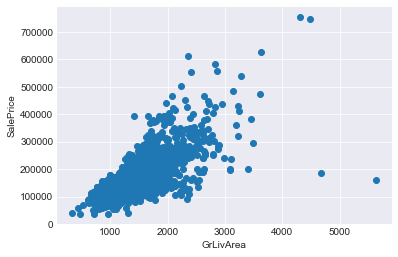

In [46]:
fig,ax=plt.subplots()
ax.scatter(x=train["GrLivArea"],y=train["SalePrice"])
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.show()

In [53]:
# Doing some outlier removal work
train=train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)

# For some reason, the boolean conditions should always be wrapped in brackets 
# Why index is involved is unknown at this point 

# Target Variable 
Look at and analyze the target variable 


 mu=180933 and sigma =79468



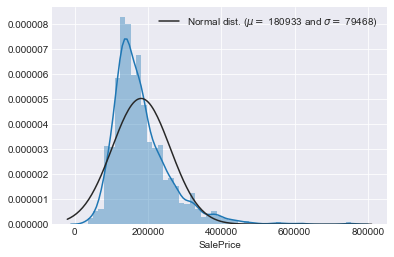

In [67]:
sns.distplot(train["SalePrice"],fit=norm);

# Get the fitted parameters used by the function
(mu,sigma)=norm.fit(train["SalePrice"])
print("\n mu={:.0f} and sigma ={:.0f}\n".format(mu,sigma))
plt.legend(["Normal dist. ($\mu=$ {:.0f} and $\sigma =$ {:.0f})".format(mu,sigma)],loc="best")

plt.ylabel("Frequency")
plt.title("SalePrice distribution")

# getting the QQ plot
fig=plt.figure()
res=stats.probplot(train["SalePric"])